Get the datasets

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-06-03 19:21:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   166MB/s    in 0.9s    

2020-06-03 19:21:16 (166 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-06-03 19:21:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  20.8MB/s    in 0.5s    

2020-06-03 19:21:28 (20.8 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



Import the libraries

In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


Unzip the data

In [0]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like in the horses and humans training directories:

In [0]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse15-5.png', 'horse36-3.png', 'horse14-7.png', 'horse13-4.png', 'horse34-3.png', 'horse35-8.png', 'horse41-2.png', 'horse25-7.png', 'horse48-6.png', 'horse02-0.png']
['human08-23.png', 'human11-09.png', 'human10-05.png', 'human14-01.png', 'human17-10.png', 'human02-09.png', 'human02-08.png', 'human06-18.png', 'human08-19.png', 'human02-30.png']
['horse4-188.png', 'horse1-276.png', 'horse2-441.png', 'horse4-503.png', 'horse3-521.png', 'horse1-000.png', 'horse2-136.png', 'horse5-018.png', 'horse2-218.png', 'horse5-100.png']
['valhuman04-20.png', 'valhuman01-10.png', 'valhuman02-24.png', 'valhuman05-14.png', 'valhuman01-01.png', 'valhuman01-05.png', 'valhuman02-21.png', 'valhuman01-22.png', 'valhuman01-09.png', 'valhuman05-06.png']


Let's find out the total number of horse and human images in the directories:

In [0]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows=4
ncols=4

# Index for iterating over images
pic_index=0

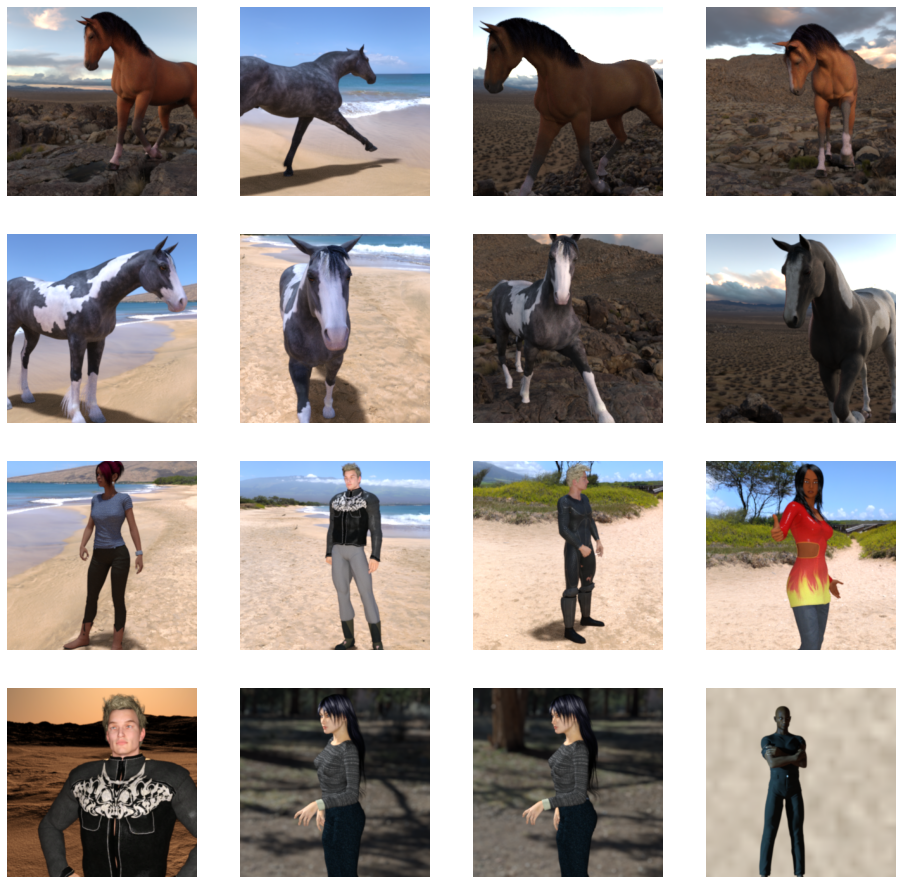

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Building a Small Model from Scratch

In [0]:
model=tf.keras.models.Sequential([
      # Note the input shape is the desired size of the image 300x300 with 3 bytes color
      # This is the first convolution
      tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      # The second convolution
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The third convolution
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The fourth convolution
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The fifth convolution
      tf.keras.layers.Conv2D(62,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

Data Preprocessing

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(
                '/tmp/horse-or-human/',
                target_size=(300,300),
                batch_size=128,
                class_mode='binary')

validation_generator=validation_datagen.flow_from_directory(
              '/tmp/validation-horse-or-human/',
              target_size=(300, 300), 
              batch_size=32,
              class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Training

In [0]:
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 72s 9s/step - loss: 0.8376 - accuracy: 0.4972 - val_loss: 0.6841 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 80s 10s/step - loss: 0.6740 - accuracy: 0.7508 - val_loss: 0.5634 - val_accuracy: 0.8555
Epoch 3/15
8/8 [==============================] - 70s 9s/step - loss: 1.2878 - accuracy: 0.7475 - val_loss: 0.8255 - val_accuracy: 0.5312
Epoch 4/15
8/8 [==============================] - 79s 10s/step - loss: 0.4151 - accuracy: 0.7910 - val_loss: 0.8329 - val_accuracy: 0.8477
Epoch 5/15
8/8 [==============================] - 80s 10s/step - loss: 0.2466 - accuracy: 0.9021 - val_loss: 1.2124 - val_accuracy: 0.8164
Epoch 6/15
8/8 [==============================] - 70s 9s/step - loss: 0.1801 - accuracy: 0.9321 - val_loss: 1.6670 - val_accuracy: 0.7461
Epoch 7/15
8/8 [==============================] - 70s 9s/step - loss: 0.2424 - accuracy: 0.9043 - val_loss: 0.5456 - val_accuracy: 0.8555
Epoch 8/15
8/8 [===============

Running the Model

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving helena-lopes-7FC4WpyYcfQ-unsplash.jpg to helena-lopes-7FC4WpyYcfQ-unsplash.jpg
[0.]
helena-lopes-7FC4WpyYcfQ-unsplash.jpg is a horse
